In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data.shape

(768, 9)

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42, shuffle=False)

In [10]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i]=knn.score(x_train, y_train)
    test_accuracy[i]=knn.score(x_test, y_test)

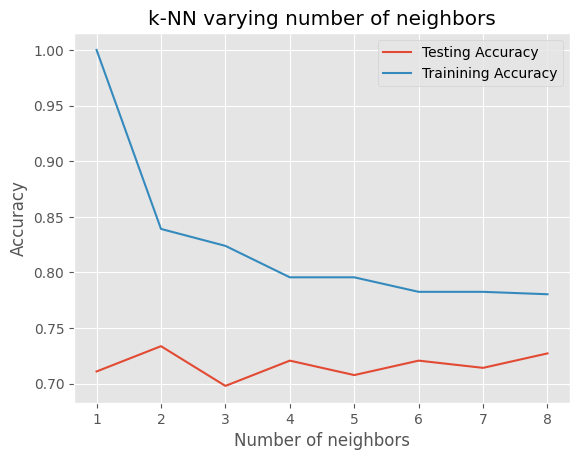

In [11]:
plt.title("k-NN varying number of neighbors")
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.plot(neighbors, train_accuracy, label="Trainining Accuracy")
plt.legend()
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=7)

In [13]:
knn.fit(x_test, y_test)

KNeighborsClassifier(n_neighbors=7)

In [14]:
y_pred = knn.predict(x_test)

In [15]:
confusion_matrix(y_test, y_pred)

array([[176,  30],
       [ 37,  65]], dtype=int64)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       206
           1       0.68      0.64      0.66       102

    accuracy                           0.78       308
   macro avg       0.76      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



## --prac done--

## Curve plotting (optional):

In [17]:
y_pred_proba = knn.predict_proba(x_test)[:,1]

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

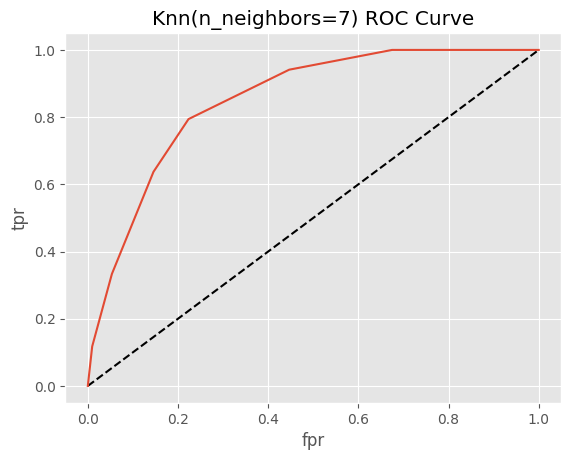

In [19]:
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label="Knn")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("Knn(n_neighbors=7) ROC Curve")
plt.show()

In [20]:
roc_auc_score(y_test, y_pred_proba)

0.8512040738625547

In [21]:
param_grid = {"n_neighbors":np.arange(1, 50)}

In [22]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [23]:
knn_cv.best_score_

0.7578558696205755

In [24]:
knn_cv.best_params_

{'n_neighbors': 14}